<a href="https://colab.research.google.com/github/B1501/Projects/blob/main/Non_Profit_Organization_(using_SAS_MINOR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#### Background You have been hired by a non-profit organization that wishes to develop predictive models to improve the cost-effectiveness of their direct marketing campaigns to prior donors. According to their recent records, the typical overall response rate is approximately 10%. Out of those who respond and donate to the mailing, the average donation is 14.50. Each mailing costs 2.00 to produce and send; the mailing includes a gift of personalized address labels. It is not cost-effective to mail everyone because the expected profit from each mailing is 14.50 x 10% – 2 = -0.55.Your client would like to develop a classification model using data from the most recent campaign that can effectively capture likely donors so that the expected net profit is maximized (i.e., ideally maximize the number of donors who receive a flyer and minimize the recipients who are non-donors). The entire dataset consists of 3,984 training observations, 2018 validation observations, and 2007 scoring observations. Note that weighted sampling has been used, over-representing the responders so that the training and validation samples have approximately equal numbers of donors and non-donors (e.g., the dataset is balanced). The response rate in the score data has the more typical 10% response rate.Your client would also like a prediction model to predict expected gift amounts from donors – the data for this will consist of the records for donors only. 


### Data Dictionary
#### • ID number [Do NOT use this as a predictor variable in any models]
#### • TER1, TER2, TER3, TER4: Region (There are five geographic regions; only four are needed for analysis since if a potential donor falls into none of the four he or she must be in the other region. Inclusion of all five indicator variables would be redundant and cause some modeling techniques to fail. A “1” indicates the potential donor belongs to this region.)
#### • OWND: (1 = homeowner, 0 = not a homeowner)
#### • KIDS: Number of children
#### • INC: Household income (7 categories)
#### • SEX: Gender (0 = Male, 1 = Female)
#### • WLTH: Wealth Rating (Wealth rating uses median family income and population statistics from each area to index relative wealth within each state. The segments are denoted 0-9, with 9 being the highest wealth group and 0 being the lowest.)
#### • HV: Average Home Value in potential donor's neighborhood in thousands dollars
#### • INCMED: Median Family Income in potential donor's neighborhood in thousands dollars
#### • INCAVG: Average Family Income in potential donor's neighborhood in thousands dollars
#### • LOW: Percent categorized as “low income” in potential donor's neighborhood
#### • NPRO: Lifetime number of promotions received to date
#### • GIFDOL: Dollar amount of lifetime gifts to date
#### • GIFL: Dollar amount of largest gift to date
#### • GIFR: Dollar amount of most recent gift
#### • MDON: Number of months since last donation
#### • LAG: Number of months between first and second gift
#### • GIFA: Average dollar amount of gifts to date
#### • DONR: Classification Response Variable (1 = Donor, 0 = Non-donor)
#### • DAMT: Prediction Response Variable (Donation Amount in dollars).
#### • VALID: Indicator of validation data
#### Note that the DONR and DAMT variables are set to missing for the score data.

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import os

os.environ["OPENBLAS_NUM_THREADS"] = "4"

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

In [ ]:
nprof_df = pd.read_csv("nonprofit.csv")

In [ ]:
nprof_df.head(10)

,ID,ter1,ter2,ter3,ter4,ownd,kids,inc,sex,wlth,hv,incmed,incavg,low,npro,gifdol,gifl,gifr,mdon,lag,gifa,donr,damt,valid
0,1,0,0,1,0,1,1,4,1,8,302,76,82,0,20,81,81,19,17,6,21.05,0,0,0
1,2,0,0,1,0,1,2,4,0,8,262,130,130,1,95,156,16,17,19,3,13.26,1,15,0
2,5,0,0,1,0,1,0,4,1,4,295,39,71,14,85,132,15,10,10,6,12.07,1,17,1
3,6,0,1,0,0,1,1,5,0,9,114,17,25,44,83,131,5,3,13,4,4.12,1,12,0
4,7,0,0,0,0,1,3,4,0,8,145,39,42,10,50,74,6,5,22,3,6.50,0,0,1
5,8,0,0,0,0,1,3,2,0,5,165,34,35,19,11,41,4,2,20,7,3.45,0,0,1
6,10,0,0,0,0,1,3,4,1,7,200,38,58,5,42,63,12,10,19,3,9.42,0,0,0
7,11,0,0,1,0,1,3,2,1,8,152,46,46,20,100,414,25,14,39,7,10.12,0,0,1
8,12,0,0,0,1,1,3,4,1,6,272,69,69,0,98,169,29,36,23,7,8.97,1,17,0
9,13,0,1,0,0,1,0,4,0,9,207,54,54,14,13,34,9,7,19,11,6.28,1,12,0


In [ ]:
nprof_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6002 entries, 0 to 6001
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      6002 non-null   int64  
 1   ter1    6002 non-null   int64  
 2   ter2    6002 non-null   int64  
 3   ter3    6002 non-null   int64  
 4   ter4    6002 non-null   int64  
 5   ownd    6002 non-null   int64  
 6   kids    6002 non-null   int64  
 7   inc     6002 non-null   int64  
 8   sex     6002 non-null   int64  
 9   wlth    6002 non-null   int64  
 10  hv      6002 non-null   int64  
 11  incmed  6002 non-null   int64  
 12  incavg  6002 non-null   int64  
 13  low     6002 non-null   int64  
 14  npro    6002 non-null   int64  
 15  gifdol  6002 non-null   int64  
 16  gifl    6002 non-null   int64  
 17  gifr    6002 non-null   int64  
 18  mdon    6002 non-null   int64  
 19  lag     6002 non-null   int64  
 20  gifa    6002 non-null   float64
 21  donr    6002 non-null   int64  
 22  

In [ ]:
nprof_df.ID = nprof_df.ID.astype('object')

In [ ]:
nprof_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6002 entries, 0 to 6001
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      6002 non-null   object 
 1   ter1    6002 non-null   int64  
 2   ter2    6002 non-null   int64  
 3   ter3    6002 non-null   int64  
 4   ter4    6002 non-null   int64  
 5   ownd    6002 non-null   int64  
 6   kids    6002 non-null   int64  
 7   inc     6002 non-null   int64  
 8   sex     6002 non-null   int64  
 9   wlth    6002 non-null   int64  
 10  hv      6002 non-null   int64  
 11  incmed  6002 non-null   int64  
 12  incavg  6002 non-null   int64  
 13  low     6002 non-null   int64  
 14  npro    6002 non-null   int64  
 15  gifdol  6002 non-null   int64  
 16  gifl    6002 non-null   int64  
 17  gifr    6002 non-null   int64  
 18  mdon    6002 non-null   int64  
 19  lag     6002 non-null   int64  
 20  gifa    6002 non-null   float64
 21  donr    6002 non-null   int64  
 22  

In [ ]:
nprof_df.isna().sum()

ID        0
ter1      0
ter2      0
ter3      0
ter4      0
ownd      0
kids      0
inc       0
sex       0
wlth      0
hv        0
incmed    0
incavg    0
low       0
npro      0
gifdol    0
gifl      0
gifr      0
mdon      0
lag       0
gifa      0
donr      0
damt      0
valid     0
dtype: int64

In [ ]:
nprof_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ter1,6002.0,0.201433,0.401104,0.00,0.00,0.0,0.00,1.00
ter2,6002.0,0.347051,0.476072,0.00,0.00,0.0,1.00,1.00
ter3,6002.0,0.121293,0.326495,0.00,0.00,0.0,0.00,1.00
ter4,6002.0,0.132456,0.339014,0.00,0.00,0.0,0.00,1.00
ownd,6002.0,0.884538,0.319605,0.00,1.00,1.0,1.00,1.00
kids,6002.0,1.583972,1.412455,0.00,0.00,2.0,3.00,5.00
inc,6002.0,3.939020,1.401887,1.00,3.00,4.0,5.00,7.00
sex,6002.0,0.607797,0.488282,0.00,0.00,1.0,1.00,1.00
wlth,6002.0,7.023159,2.330964,0.00,6.00,8.0,9.00,9.00
hv,6002.0,183.905365,72.770510,51.00,134.00,170.0,218.00,710.00


In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=nprof_df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=nprof_df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=nprof_df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
       nprof_df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        nprof_df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Univariate EDA

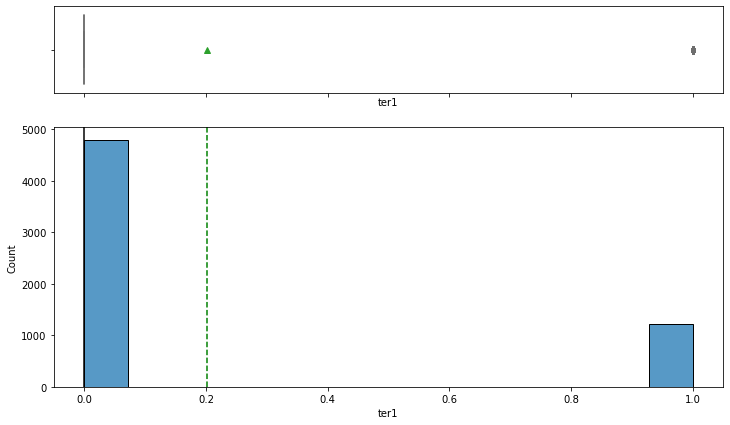

In [ ]:
histogram_boxplot(nprof_df,'ter1')

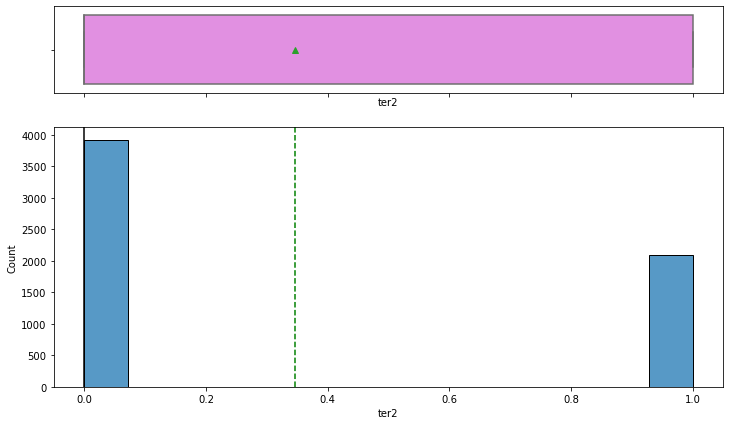

In [ ]:
histogram_boxplot(nprof_df,'ter2')

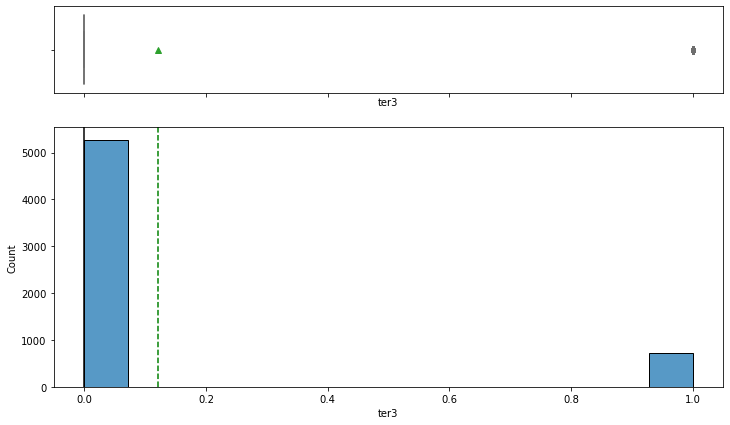

In [ ]:
histogram_boxplot(nprof_df,'ter3')

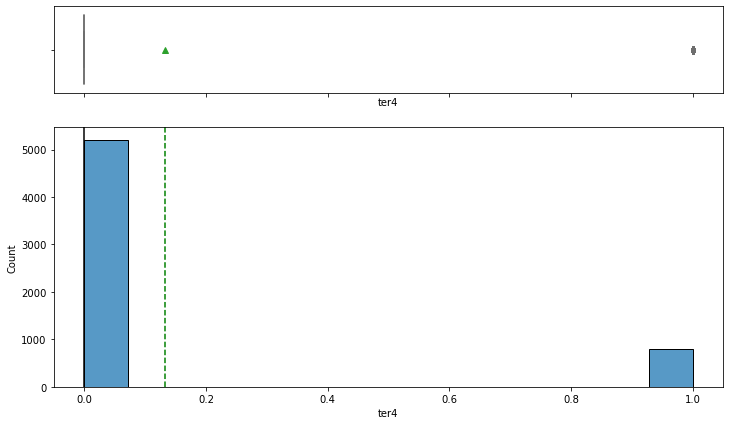

In [ ]:
histogram_boxplot(nprof_df,'ter4')

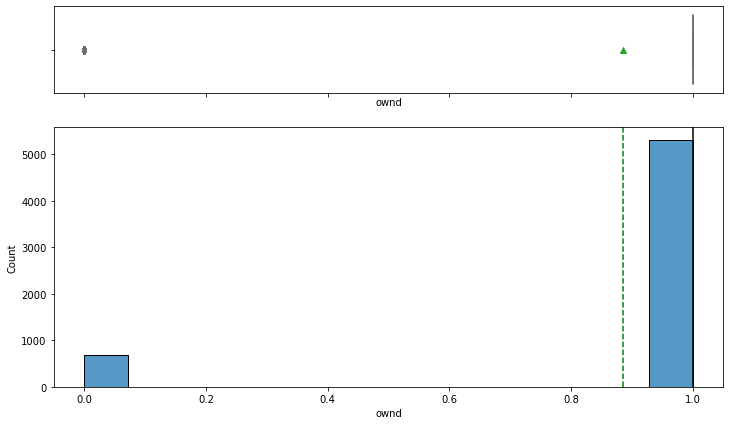

In [ ]:
histogram_boxplot(nprof_df,'ownd')

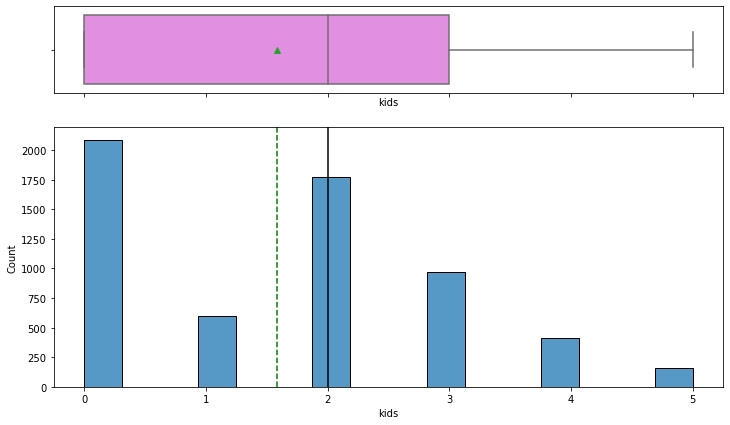

In [ ]:
histogram_boxplot(nprof_df,'kids')

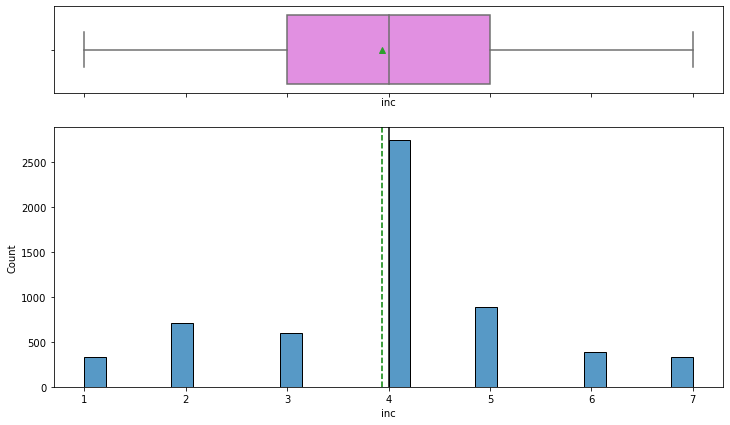

In [ ]:
histogram_boxplot(nprof_df,'inc')

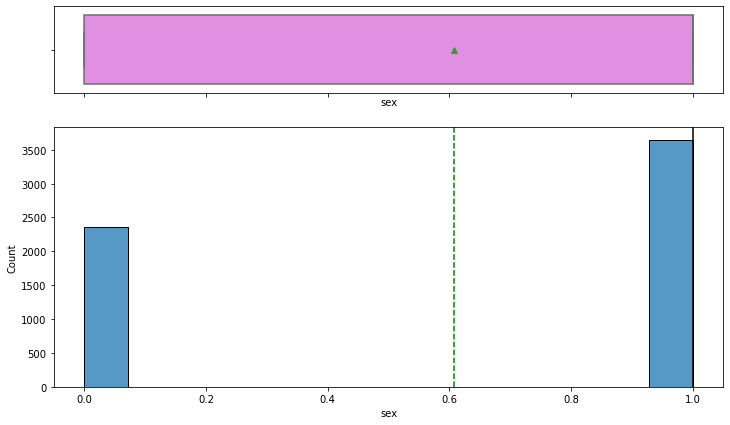

In [ ]:
histogram_boxplot(nprof_df,'sex')

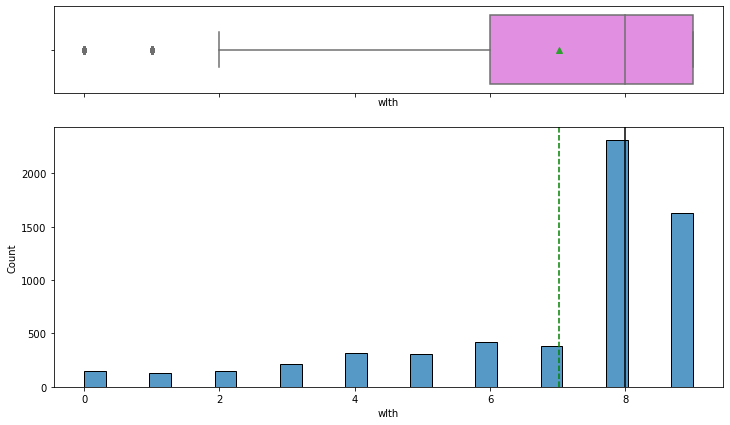

In [ ]:
histogram_boxplot(nprof_df,'wlth')

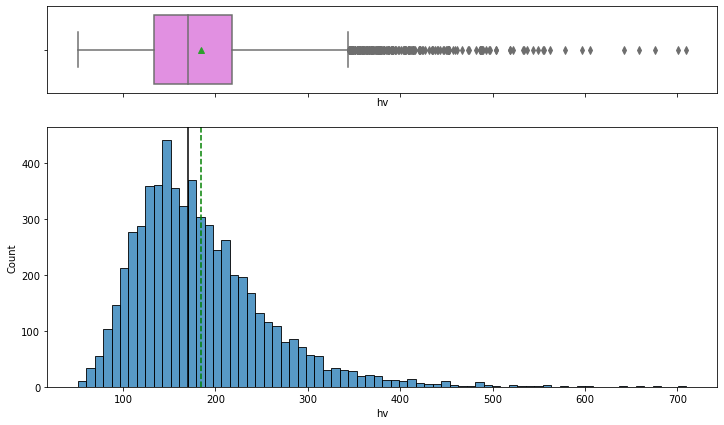

In [ ]:
histogram_boxplot(nprof_df,'hv')

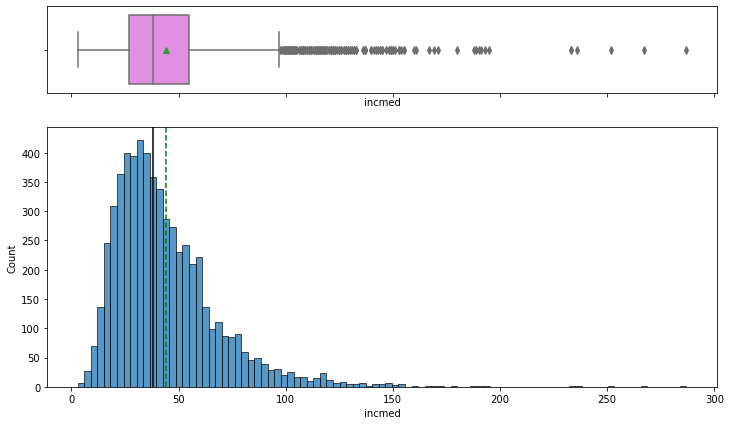

In [ ]:
histogram_boxplot(nprof_df,'incmed')

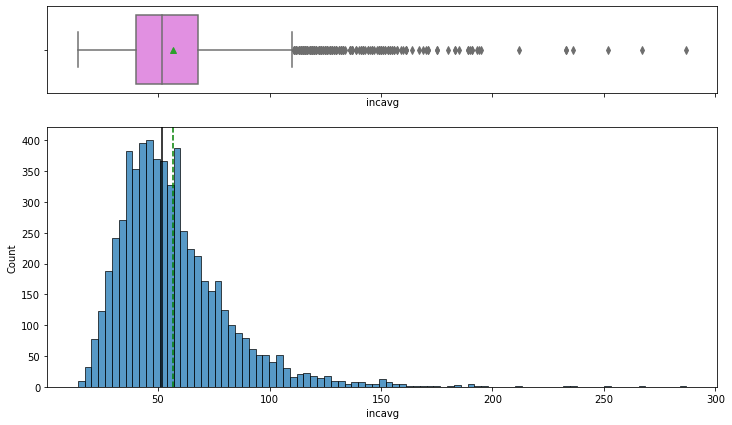

In [ ]:
histogram_boxplot(nprof_df,'incavg')

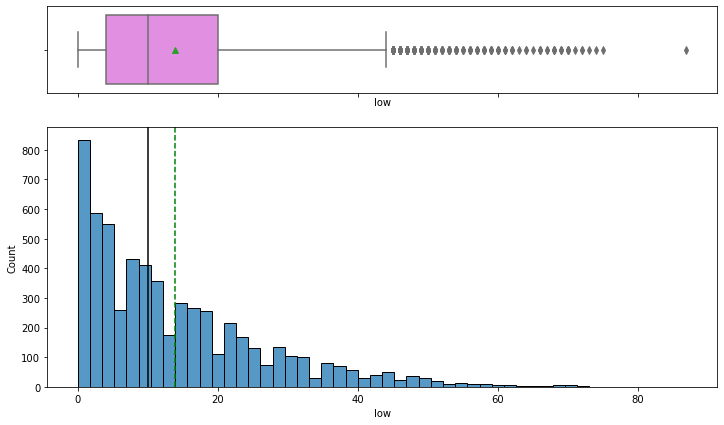

In [ ]:
histogram_boxplot(nprof_df,'low')

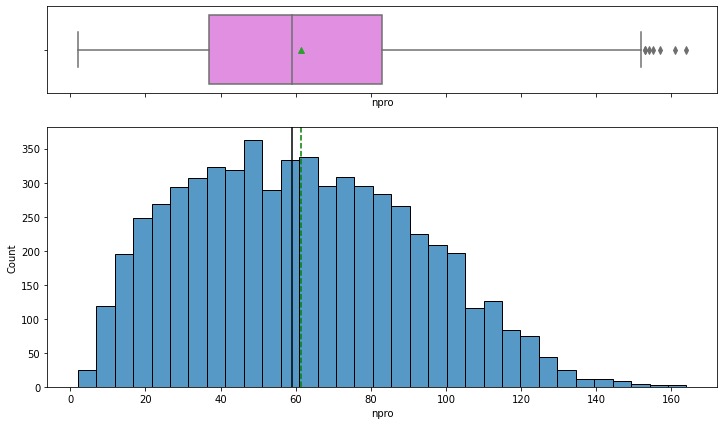

In [ ]:
histogram_boxplot(nprof_df,'npro')

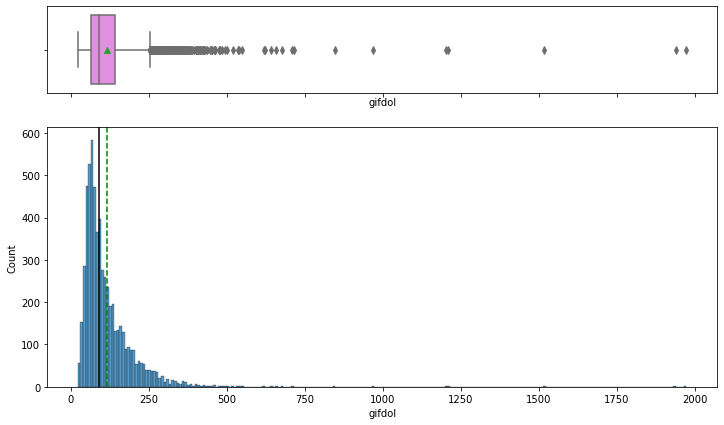

In [ ]:
histogram_boxplot(nprof_df,'gifdol')

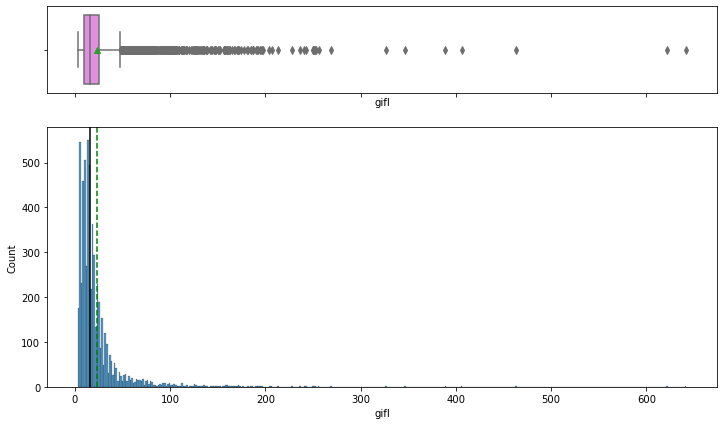

In [ ]:
histogram_boxplot(nprof_df,'gifl')

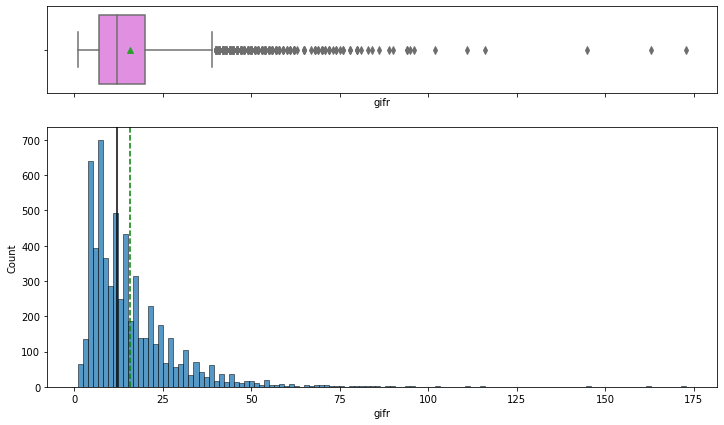

In [ ]:
histogram_boxplot(nprof_df,'gifr')

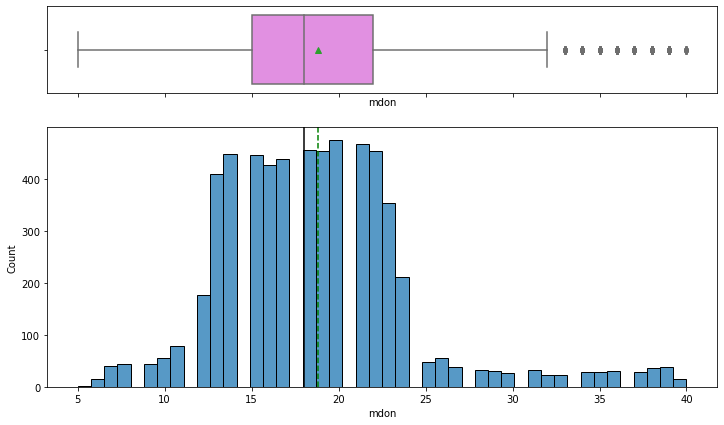

In [ ]:
histogram_boxplot(nprof_df,'mdon')

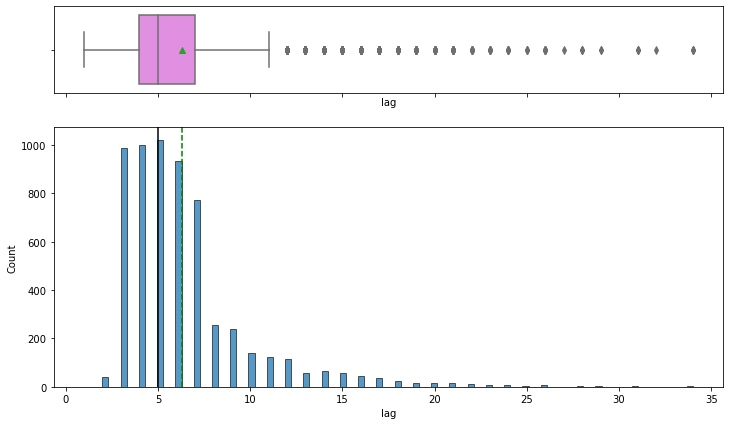

In [ ]:
histogram_boxplot(nprof_df,'lag')

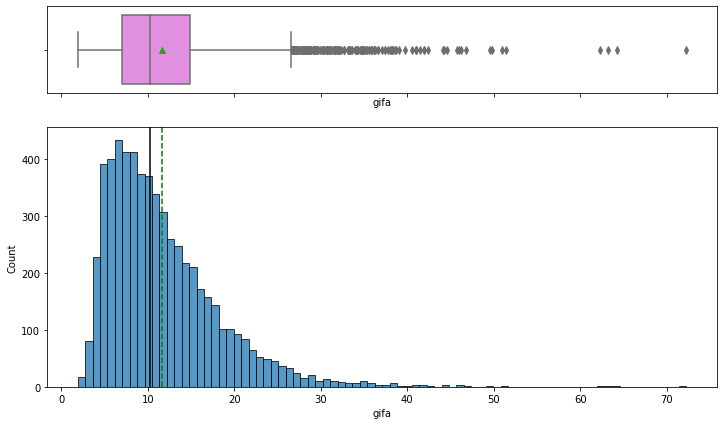

In [ ]:
histogram_boxplot(nprof_df,'gifa')

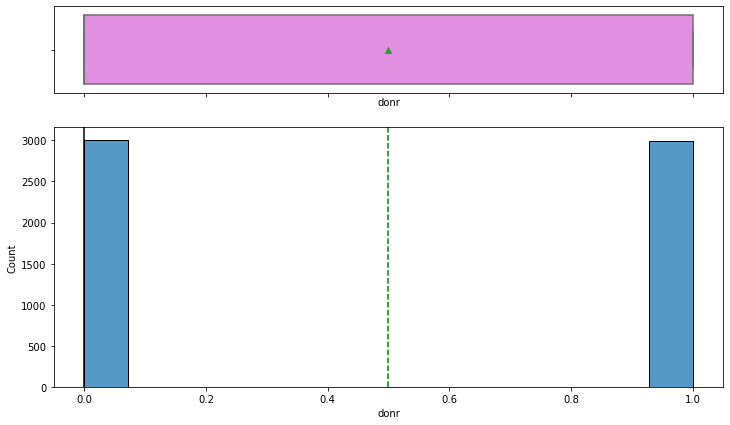

In [ ]:
histogram_boxplot(nprof_df,'donr')

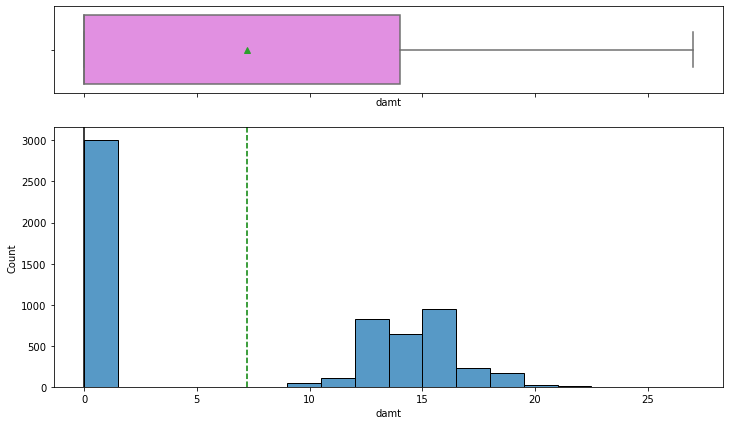

In [ ]:
histogram_boxplot(nprof_df,'damt')

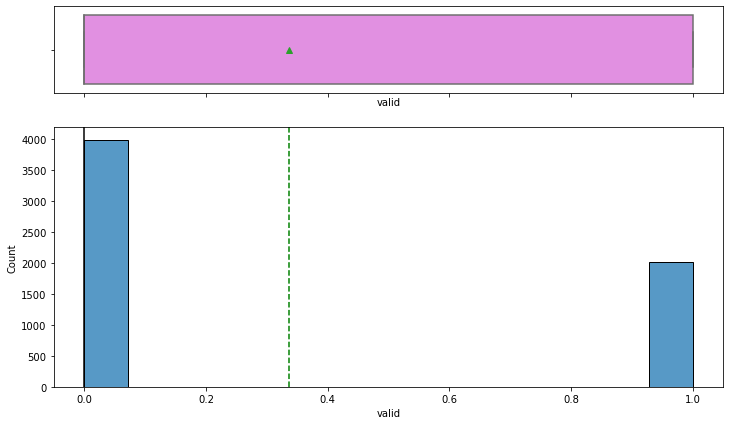

In [ ]:
histogram_boxplot(nprof_df,'valid')

### Bivariate EDA Analysis

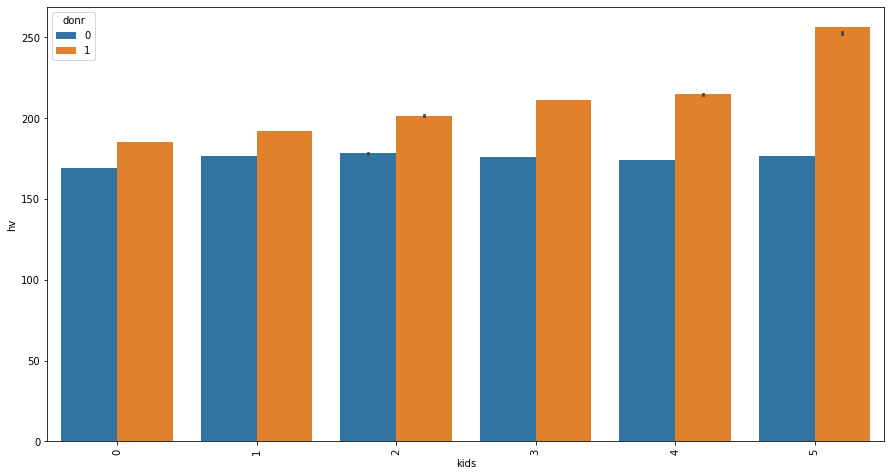

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=nprof_df, x = "kids", y="hv", hue= "donr", ci=True)
plt.xticks(rotation=90)
plt.show()

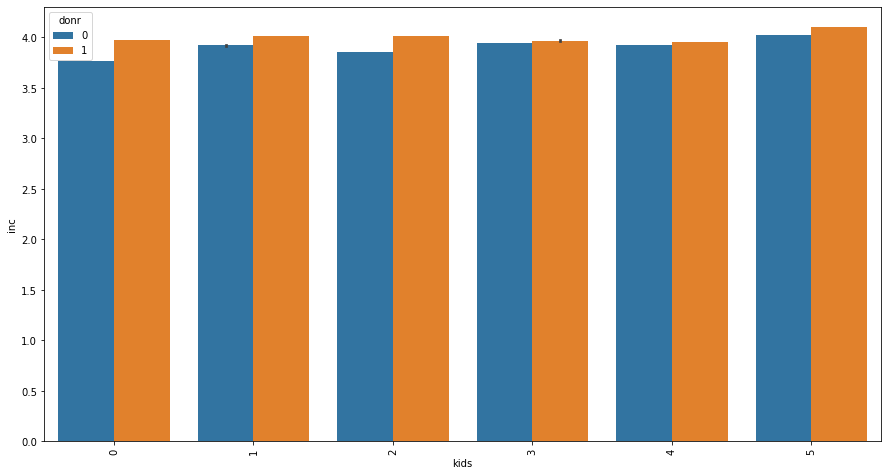

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=nprof_df, x = "kids", y="inc", hue= "donr", ci=True)
plt.xticks(rotation=90)
plt.show()

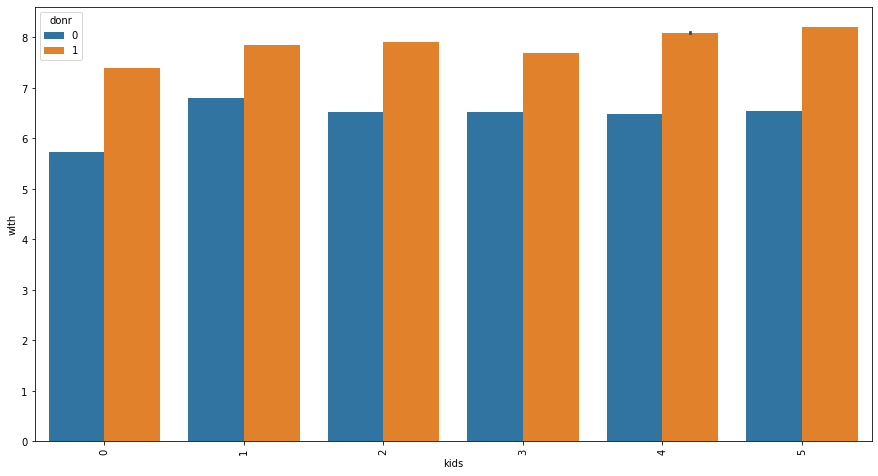

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=nprof_df, x = "kids", y="wlth", hue= "donr", ci=True)
plt.xticks(rotation=90)
plt.show()

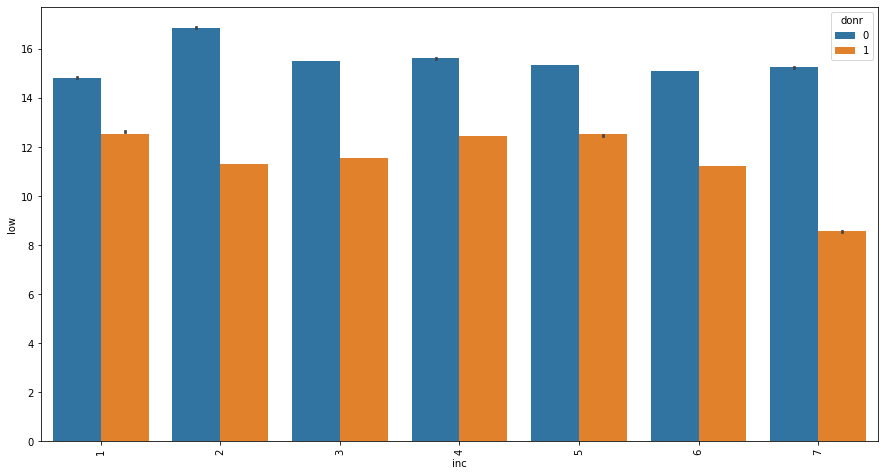

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=nprof_df, x = "inc", y="low", hue= "donr", ci=True)
plt.xticks(rotation=90)
plt.show()

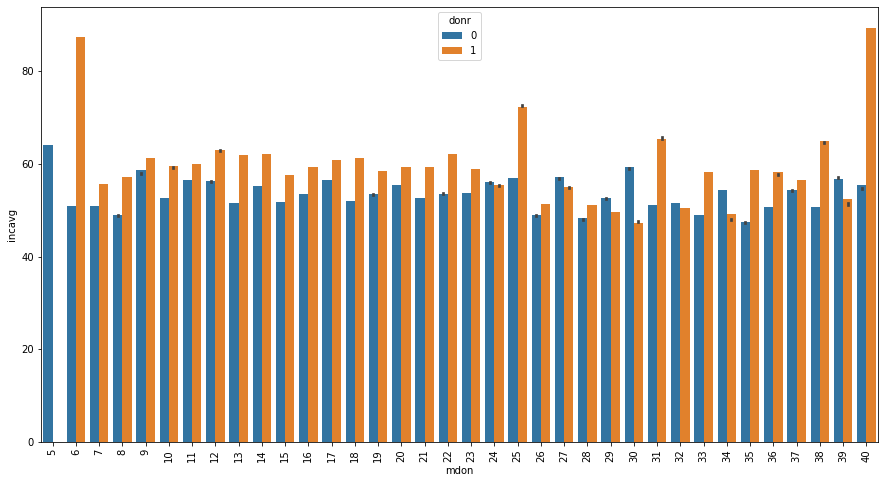

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=nprof_df, x = "mdon", y="incavg", hue= "donr", ci=True)
plt.xticks(rotation=90)
plt.show()

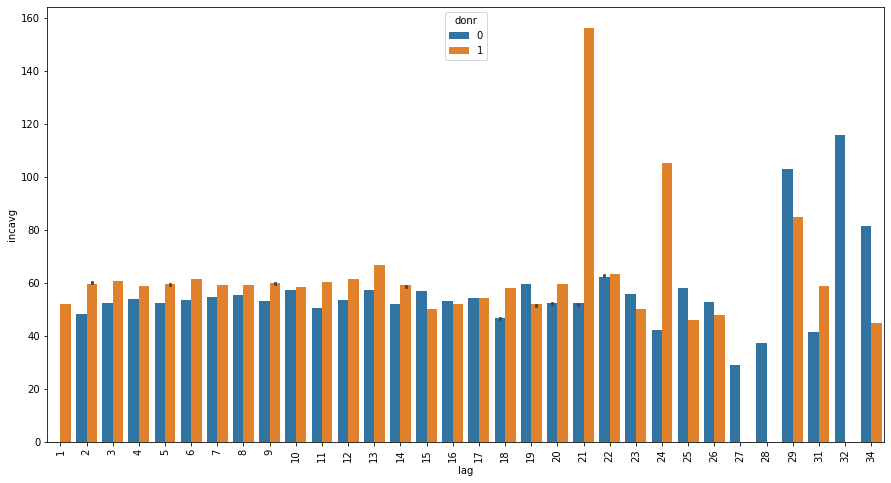

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=nprof_df, x = "lag", y="incavg", hue= "donr", ci=True)
plt.xticks(rotation=90)
plt.show()

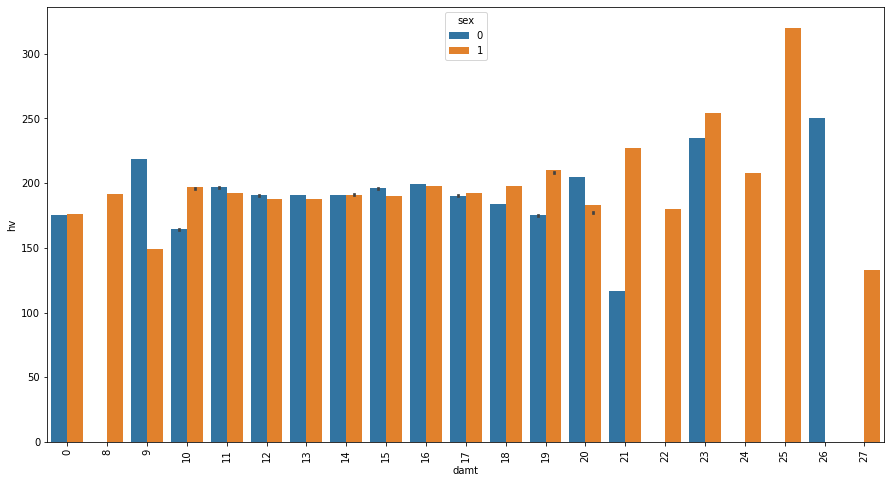

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=nprof_df, x = "damt", y="hv", hue= "sex", ci=True)
plt.xticks(rotation=90)
plt.show()

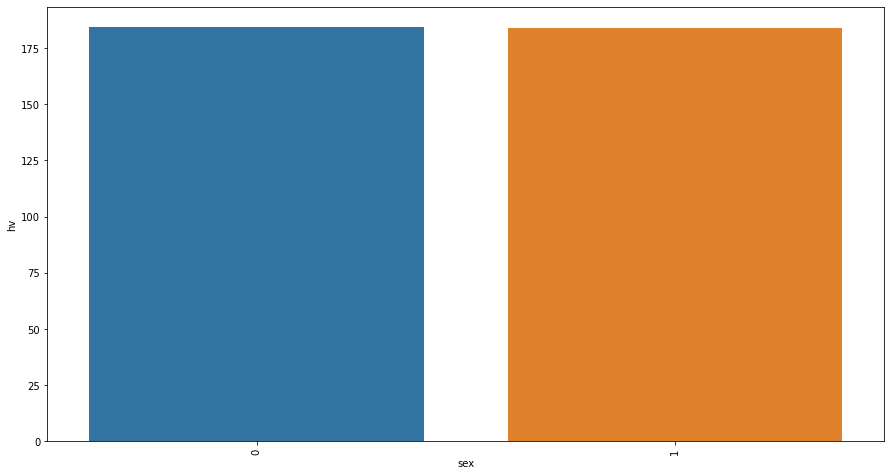

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=nprof_df, x = "sex", y="hv", ci=True)
plt.xticks(rotation=90)
plt.show()

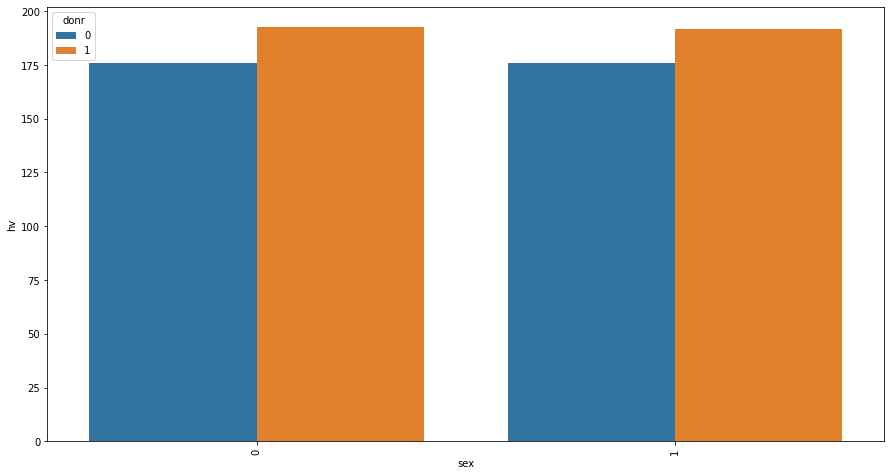

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=nprof_df, x = "sex", y="hv", hue= "donr", ci=True)
plt.xticks(rotation=90)
plt.show()

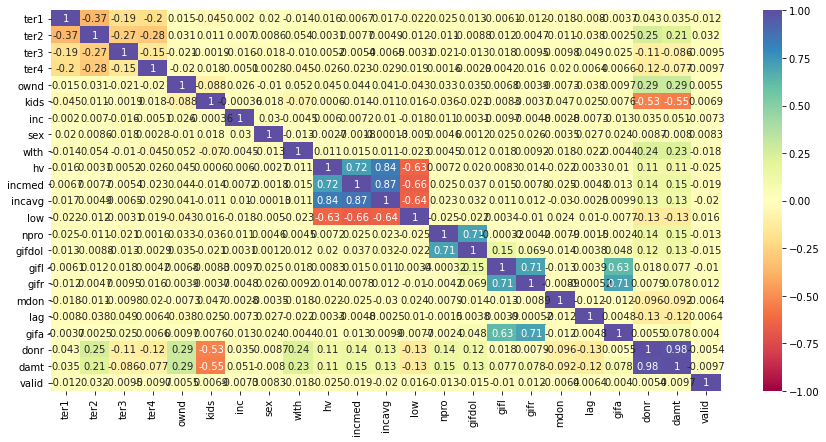

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(nprof_df.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

In [ ]:
nprof_df2 = nprof_df.drop("ID",axis=1)

In [ ]:
nprof_df2 = nprof_df2.drop("ter1",axis=1)

In [ ]:
nprof_df2 = nprof_df2.drop("ter2",axis=1)

In [ ]:
nprof_df2 = nprof_df2.drop("ter3",axis=1)

In [ ]:
nprof_df2 = nprof_df2.drop("ter4",axis=1)

In [ ]:
nprof_df2 = nprof_df2.drop("ownd",axis=1)

In [ ]:
nprof_df2 = nprof_df2.drop("sex",axis=1)

In [ ]:
nprof_df2 = nprof_df2.drop("donr",axis=1)

In [ ]:
nprof_df2 = nprof_df2.drop("valid",axis=1)

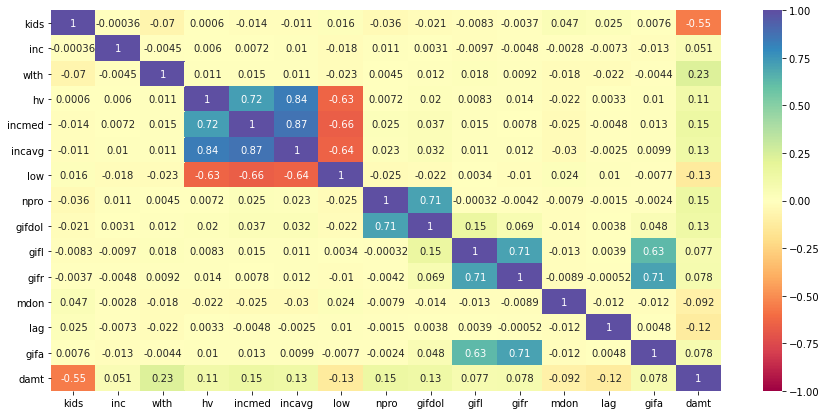

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(nprof_df2.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

In [ ]:
nprof_df2 = nprof_df2.drop("low",axis=1)

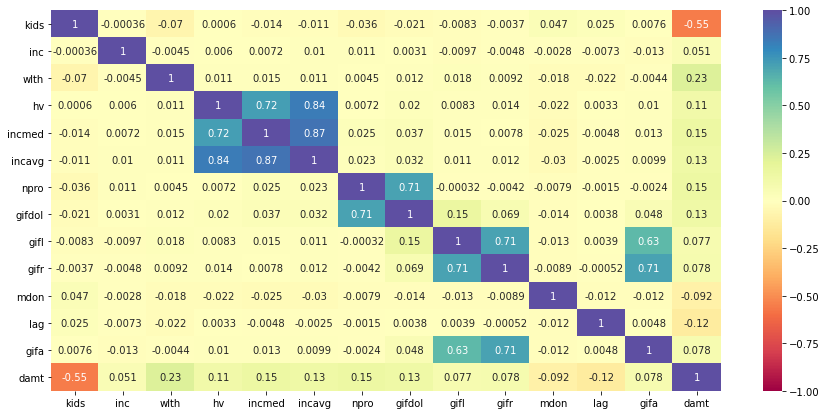

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(nprof_df2.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

In [ ]:
nprof_df2 = nprof_df2.drop("incavg",axis=1)

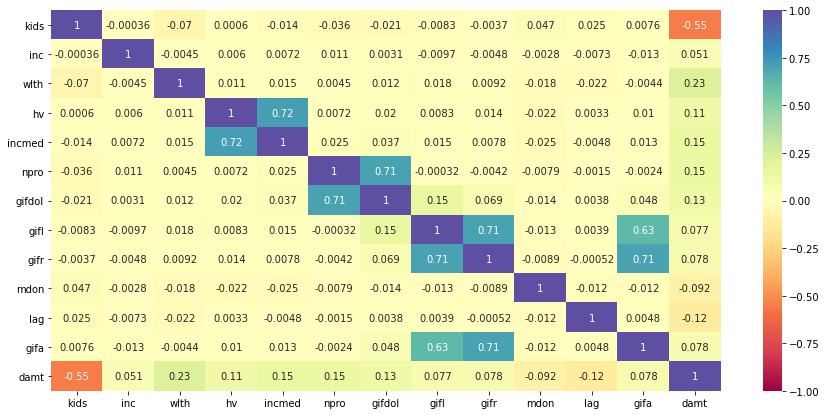

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(nprof_df2.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

In [ ]:
nprof_df2 = nprof_df2.drop("gifl",axis=1)

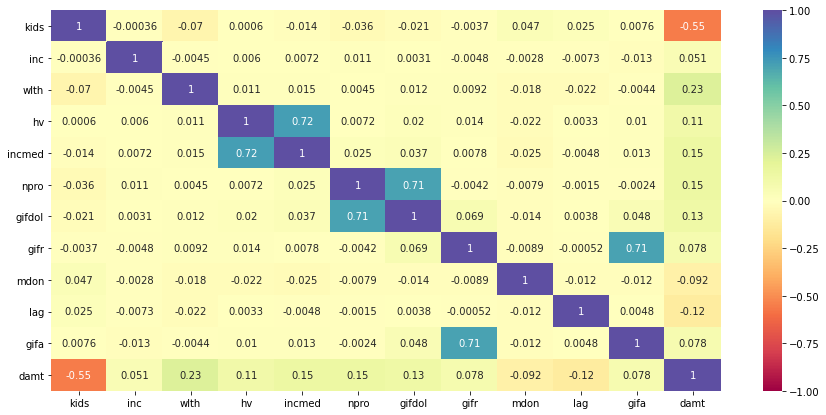

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(nprof_df2.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

In [ ]:
nprof_df2 = nprof_df2.drop("gifr",axis=1)

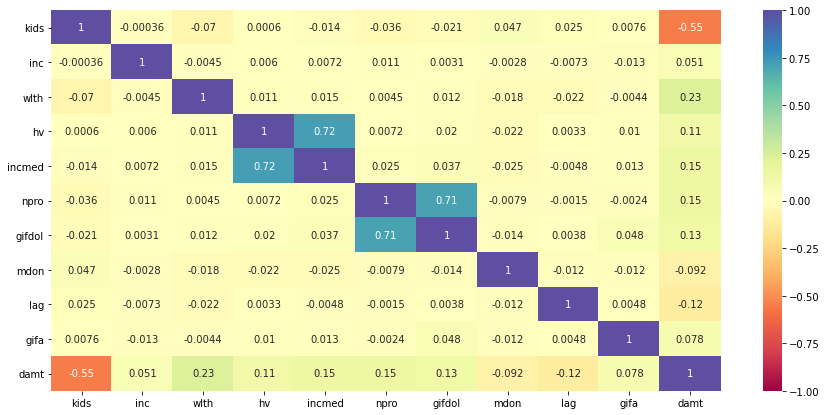

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(nprof_df2.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

In [ ]:
nprof_df2 = nprof_df2.drop("gifdol",axis=1)

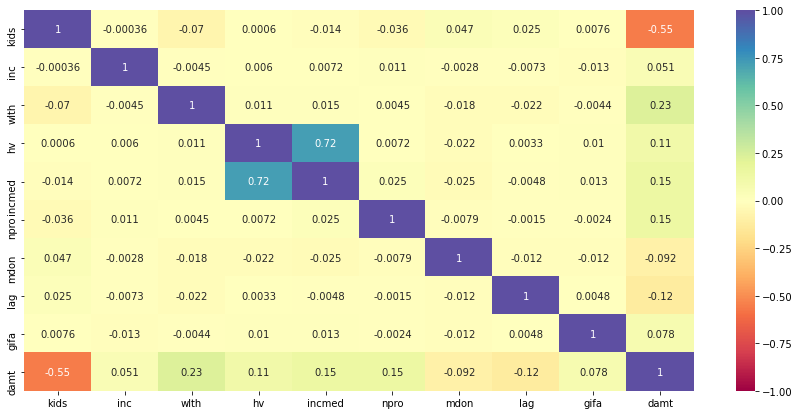

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(nprof_df2.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

In [ ]:
nprof_df2 = nprof_df2.drop("incmed",axis=1)

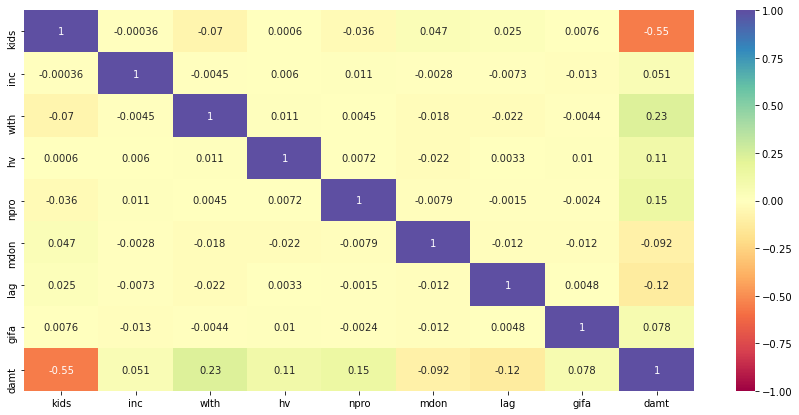

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(nprof_df2.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

In [ ]:
nprof_df2 = nprof_df2.drop("kids",axis=1)

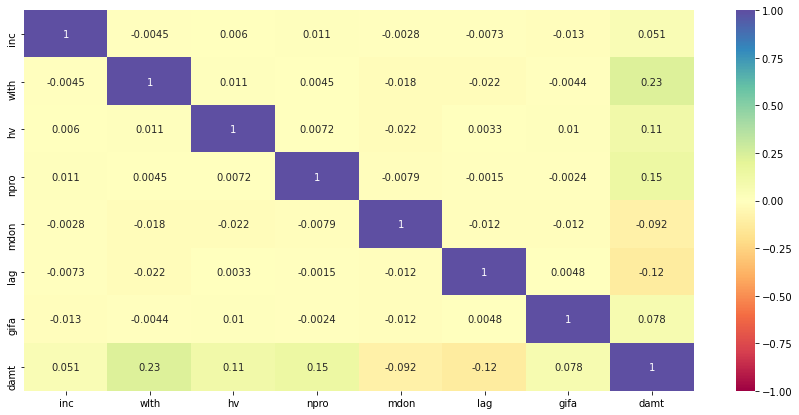

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(nprof_df2.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

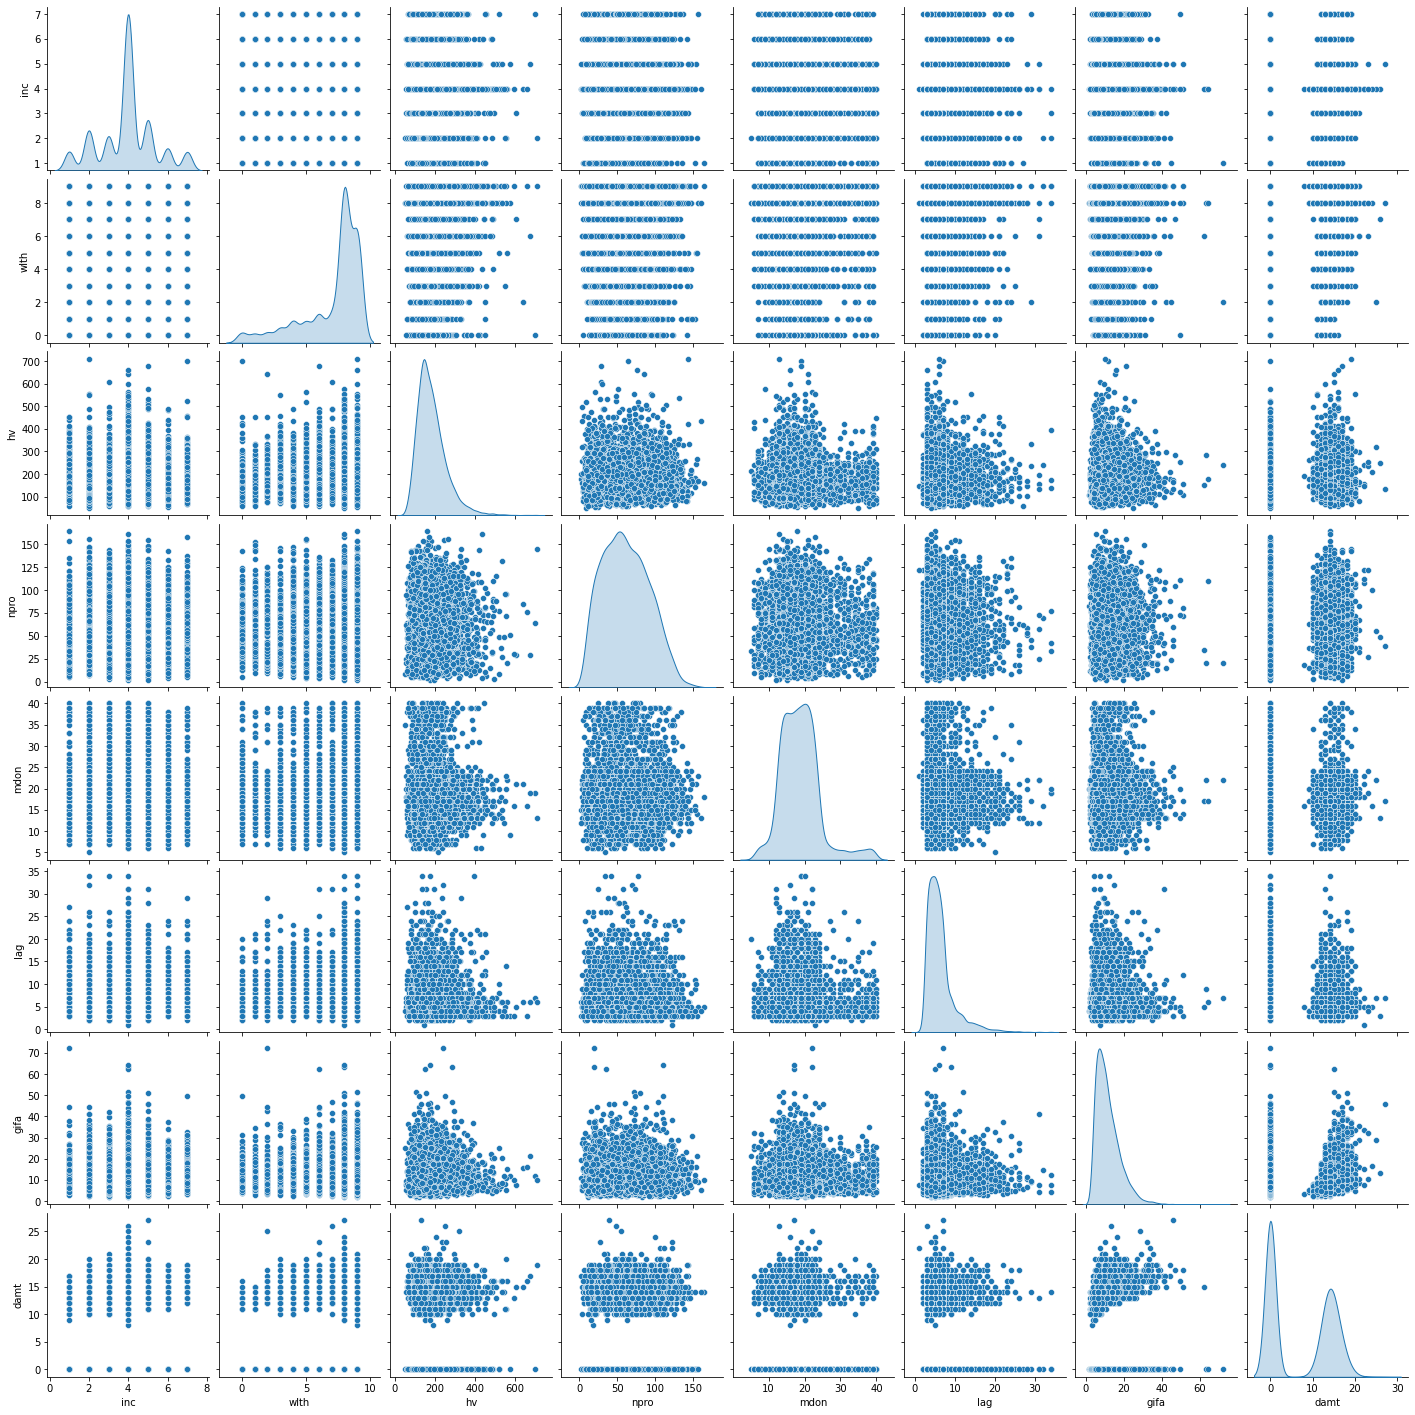

In [ ]:
sns.pairplot(data=nprof_df2, diag_kind="kde")
plt.show()